In [1]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [2]:
#@title Utils

# Función para calcular la distancia de Levenshtein entre dos cadenas
def distancia_levenshtein(s1, s2):
    m, n = len(s1), len(s2)
    dp = np.zeros((m+1, n+1))
    for i in range(m+1):
        for j in range(n+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[m][n]

<ipython-input-4-da621375cadd>:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


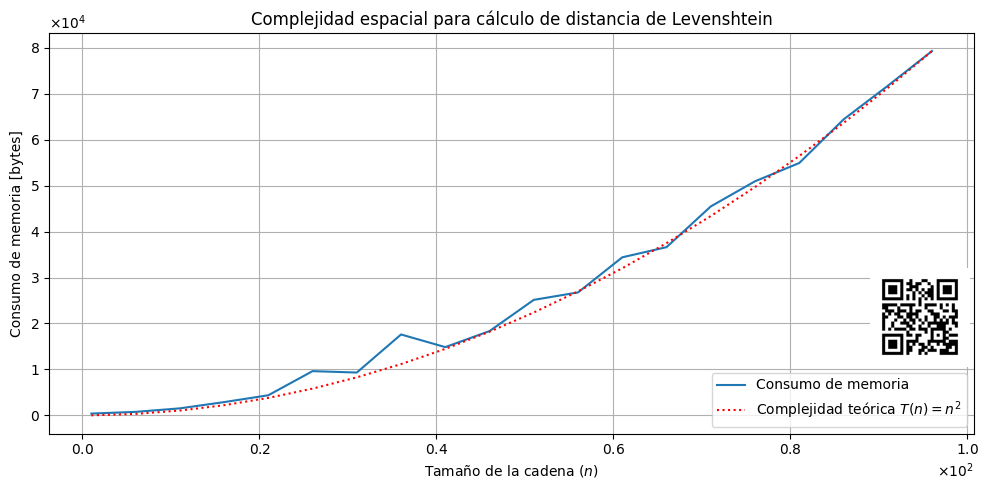

In [4]:
# Lista de tamaños de cadena para probar
tamanos_cadena = np.arange(1, 101, 5)

# Inicializar arrays para los tamaños de memoria
memoria_levenshtein = np.zeros(len(tamanos_cadena))

average = 20

# Medir el tamaño de memoria para cada tamaño de cadena
for i, n in enumerate(tamanos_cadena):
    memoria_levenshtein_n = np.zeros(average)
    for j in range(average):
        s1 = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=n))
        s2 = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=n))
        tracemalloc.start()
        distancia_levenshtein(s1, s2)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        memoria_levenshtein_n[j] = peak
    memoria_levenshtein[i] = np.mean(memoria_levenshtein_n)

# Generar el código QR
qr_data = "https://bit.ly/3V82PRp"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Memoria para calcular la distancia de Levenshtein
ax1.plot(tamanos_cadena, memoria_levenshtein, label='Consumo de memoria')

# Agregar la línea T(n) = O(n^2)
n_squared = tamanos_cadena**2
# Escalar n_squared para ajustarse a la escala de memoria_levenshtein
n_squared_scaled = n_squared * (memoria_levenshtein[-1] / n_squared[-1])
ax1.plot(tamanos_cadena, n_squared_scaled, label='Complejidad teórica $T(n)=n^2$', linestyle='dotted', color='red')

ax1.set_xlabel('Tamaño de la cadena ($n$)')
ax1.set_ylabel('Consumo de memoria [bytes]')
ax1.set_title('Complejidad espacial para cálculo de distancia de Levenshtein')
ax1.legend(loc='lower right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.875, 0.23, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('complejidad_espacial_cuadratico.png', dpi=300)